In [1]:
import os

os.chdir("..")  # set the working directory one level up
from scripts.financial_analyzer import FinancialAnalyzer

Load the data with with `ticker`


In [3]:
analyzer = FinancialAnalyzer("AAPL")
df = analyzer.load_data()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


Descriptive statistics


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


Trading Signals: `SMA`, `EMA`, `RSI`,abd `MACD`


In [5]:
sma = 100  # a short trader consider a price period  of  last 100 days
ema1 = 12  # lower EMA time period
ema2 = 26  # upper EMA time period
rsi = 14  #  consider a period of 14 days  loos and gain
df = analyzer.market_signals(df, sma, ema1, ema2, rsi)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA_1,EMA_2,RSI
Date,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,190.4912,224.625951,219.963233,48.687742
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,190.8695,223.528113,219.780031,47.386437
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,191.2981,222.671481,219.645214,48.055700
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,191.7793,221.989716,219.541125,48.476184
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,192.2761,221.498991,219.486227,49.359115


Data Visualization:


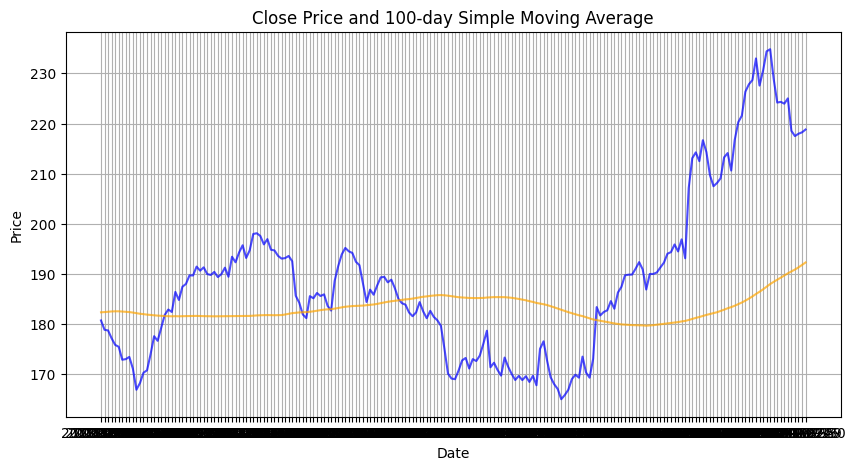

In [6]:
analyzer.sma_plot(df.iloc[-200:])

In [10]:
analyzer.rsi_plot(df.iloc[-200:])

AttributeError: 'FinancialAnalyzer' object has no attribute 'rsi_plot'

MDA


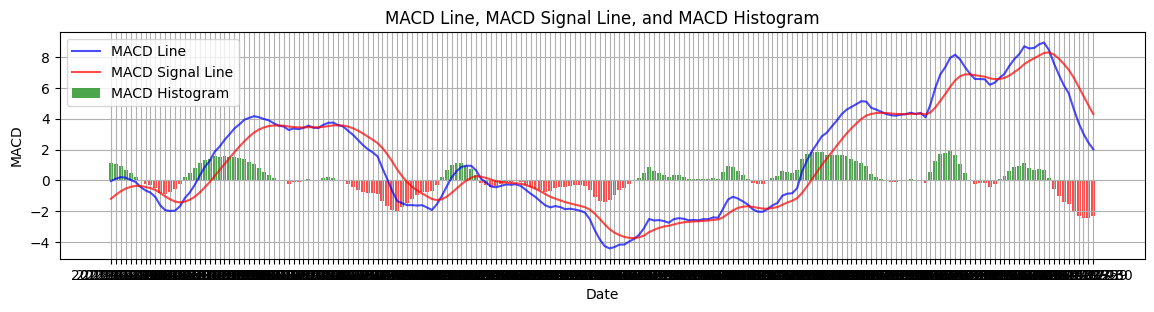

In [60]:
df["MACD_Line"], df["MACD_Signal"], df["MACD_Histogram"] = ta.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

# Plot MACD and MACD Signal
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 3)
plt.plot(df["MACD_Line"].iloc[-200:], label="MACD Line", color="blue", alpha=0.7)
plt.plot(
    df["MACD_Signal"].iloc[-200:], label="MACD Signal Line", color="red", alpha=0.7
)
plt.bar(
    df.iloc[-200:].index,
    df["MACD_Histogram"].iloc[-200:],
    color=["green" if x >= 0 else "red" for x in df["MACD_Histogram"].iloc[-200:]],
    label="MACD Histogram",
    alpha=0.7,
)
plt.title("MACD Line, MACD Signal Line, and MACD Histogram")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)